# Regresiones - TP Data Science

#### En esta notebook analizaremos el dataset "kc_house_data" que contiene el precio de venta de casas en el condado de King, Washington State, USA. El objetivo es predecir el precio de venta de las casas dadas sus características, usando varios modelos de regresión linear para luego escoger el que obtenga mejores métricas. 

### Preprocesamiento

Importamos algunas dependencias necesarias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Cargamos el dataset con pandas

In [2]:
kc_df= pd.read_csv("kc_house_data.csv")
kc_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


Eliminamos las columnas "id" y "date" que a priori decidimos que no son útiles para el análisis.

In [3]:
columns_drop=["id","date"]
kc_df.drop(columns=columns_drop,inplace=True)
kc_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
kc_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [125]:
kc_df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
average_price    0
dtype: int64

Ya que el zipcode no se puede emplear directamente en los modelo de regresión, generamos una nueva columna llamada "average_price" que se completará con el promedio del precio calculado dentro de cada zipcode

In [5]:
average_prices = kc_df.groupby('zipcode')['price'].mean()

kc_df['average_price'] = kc_df.apply(lambda row: average_prices[row['zipcode']], axis=1)
kc_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,average_price
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,310612.755725
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,469455.770732
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,462480.035336
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,551688.673004
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,685605.775510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,584919.210963
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,359483.239583
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,594547.650146
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,616990.592233


### Realizamos el EDA antes de realizar el split train-test

Ploteamos una matriz de correlación entre todas las variables del df para ver como se relacionan entre sí.

<Axes: >

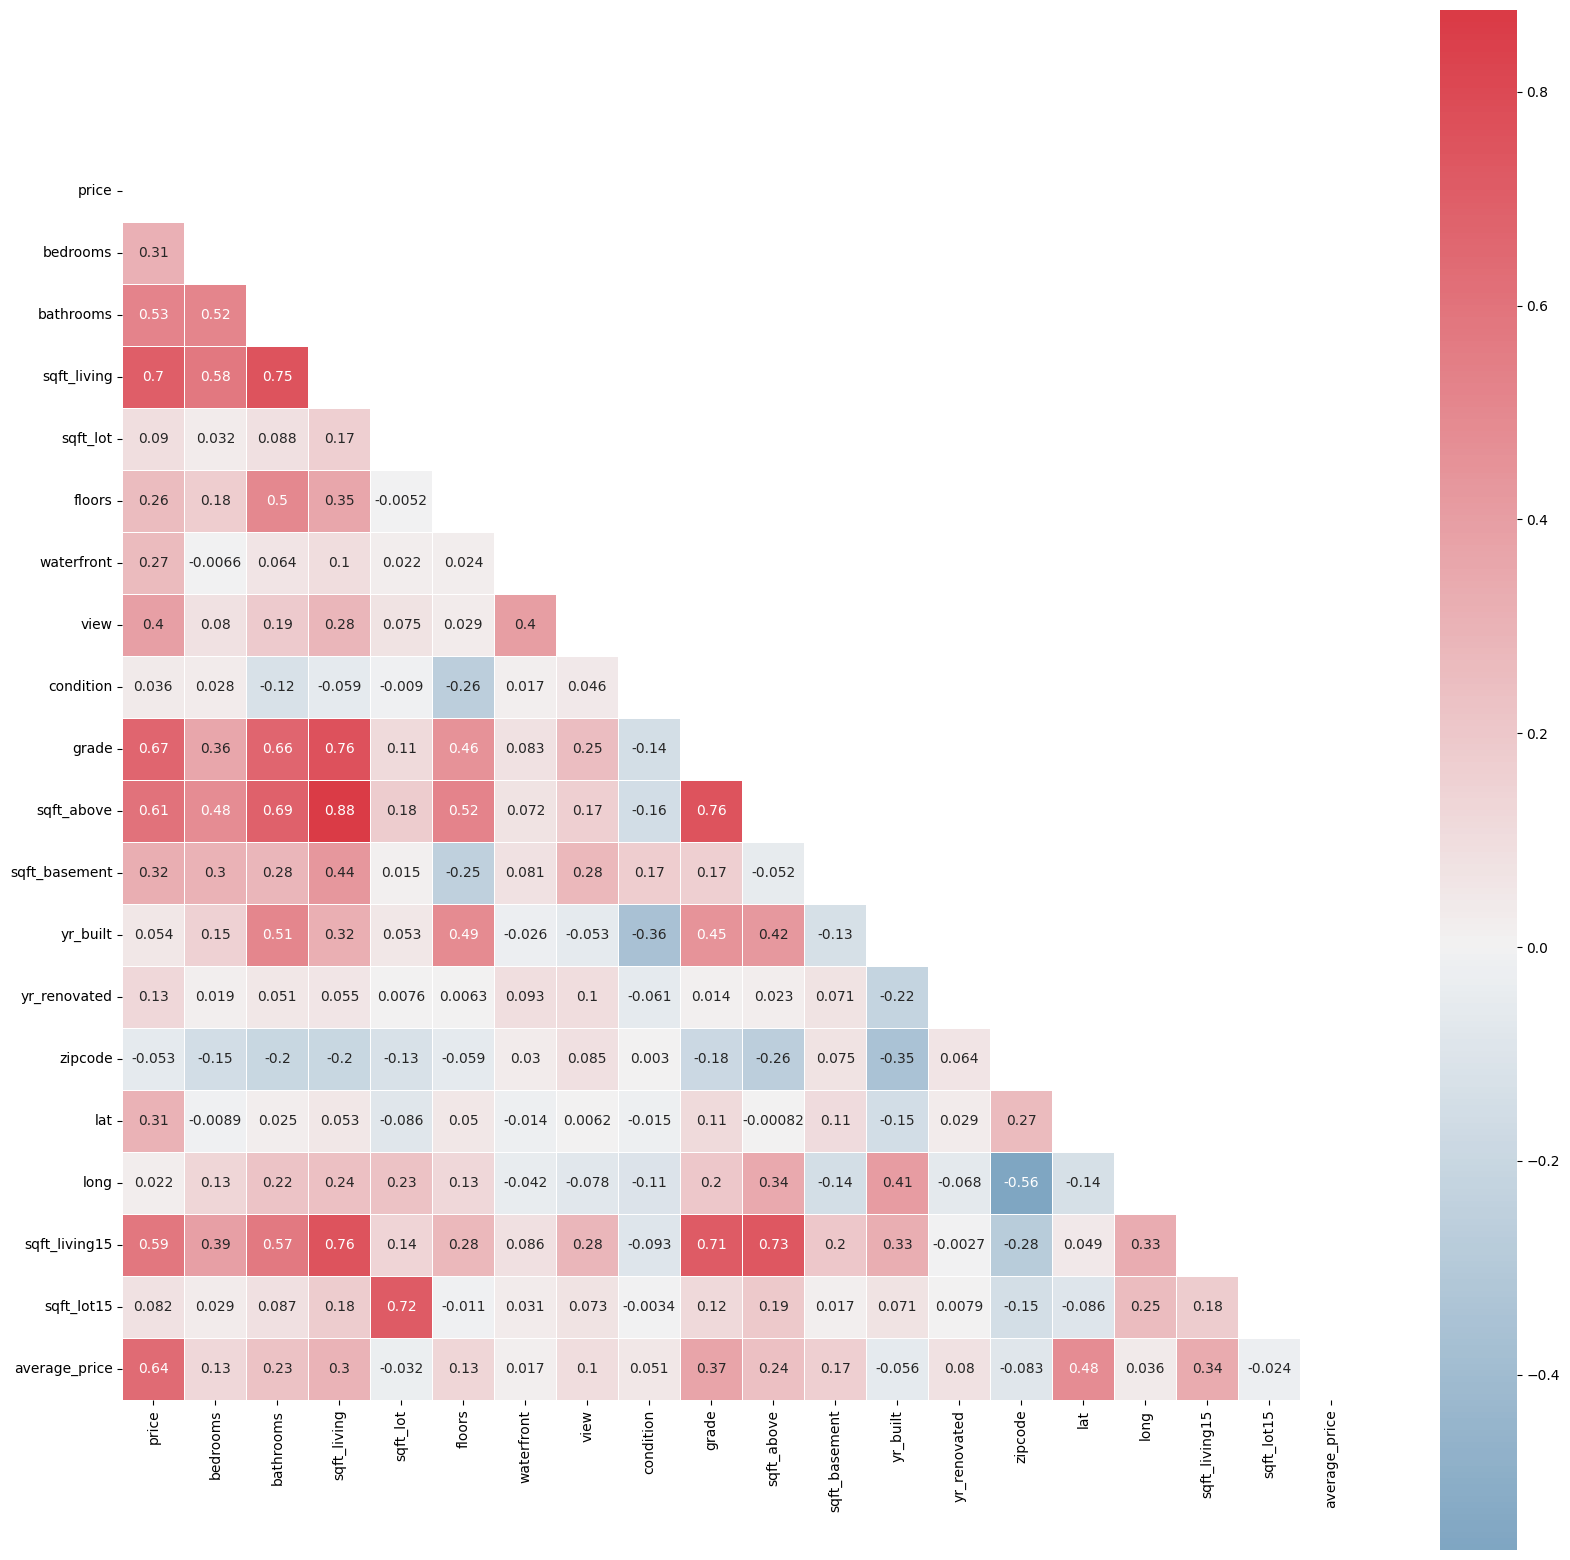

In [6]:
mask = np.triu(np.ones_like(kc_df.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(kc_df.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True)

Realizamos una matriz de correlación solo con la columna target 'price'

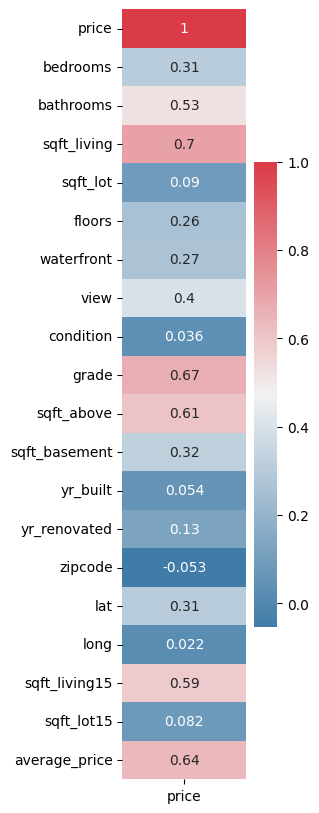

In [7]:
target_corr = pd.DataFrame(kc_df.corr()['price'], index=kc_df.corr().index)
plt.figure(figsize=(2,10))
sns.heatmap(target_corr, annot=True, cmap=cmap)
plt.show()

Realizamos un histograma para evaluar la distribución de los precios de las casas

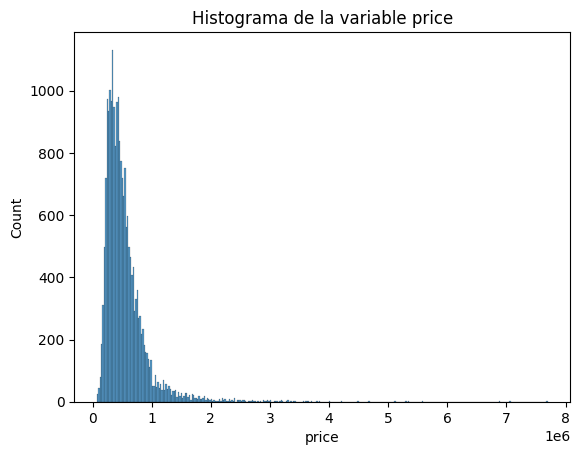

In [8]:
fig = plt.figure()
ax = plt.axes()
ax = sns.histplot(x=kc_df.price)
ax.set_title("Histograma de la variable price")
plt.show()

Evaluamos la distribución de la variable target "price"

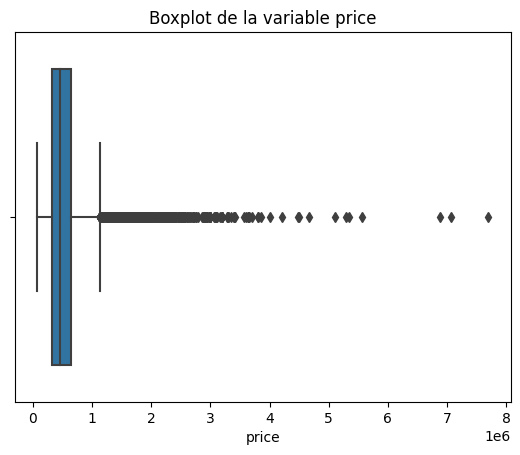

In [126]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=kc_df.price)
ax.set_title("Boxplot de la variable price")
plt.show()

Countplot de la variable zipcode

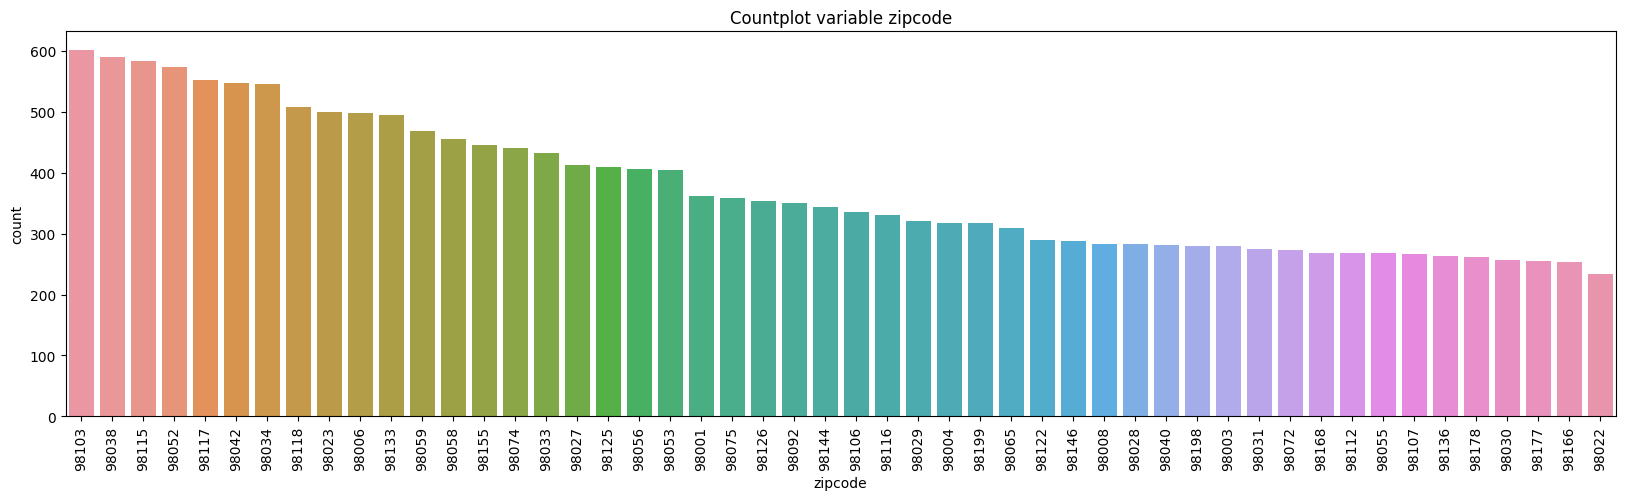

In [10]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.countplot(x='zipcode', data=kc_df, order=kc_df.zipcode.value_counts()[:50].index)
plt.xticks(rotation=90)
plt.title("Countplot variable zipcode")
plt.show()

Realizamos un countplot de la variable bedrooms 

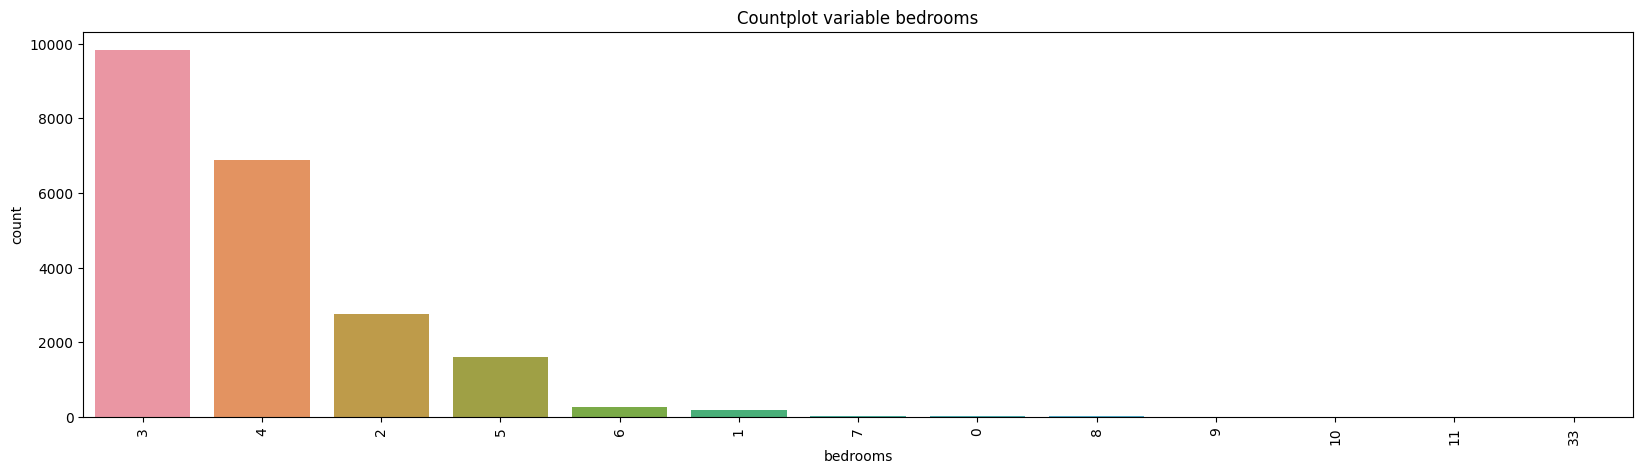

In [11]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax = sns.countplot(x='bedrooms', data=kc_df, order=kc_df.bedrooms.value_counts().index)
plt.xticks(rotation=90)
plt.title("Countplot variable bedrooms")
plt.show()

Countplot de la variable floors

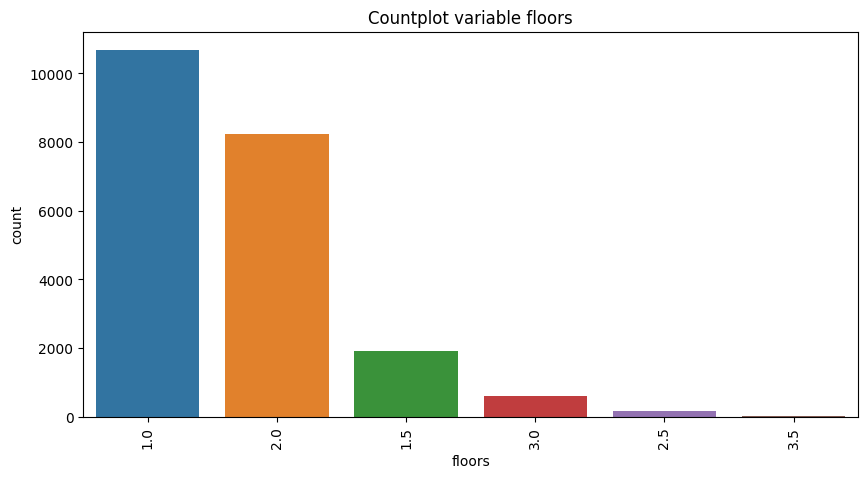

In [12]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax = sns.countplot(x='floors', data=kc_df, order=kc_df.floors.value_counts().index)
plt.xticks(rotation=90)
plt.title("Countplot variable floors")
plt.show()

Countplot de la variable condition

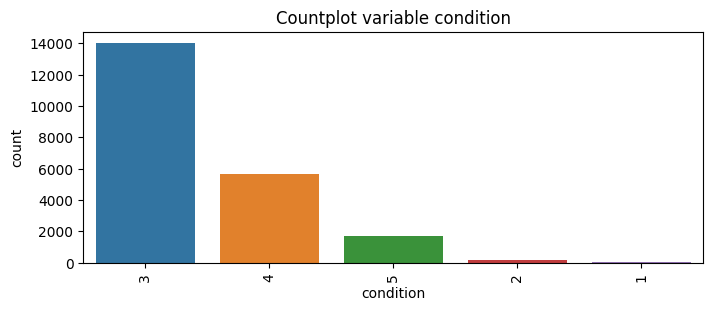

In [13]:
fig = plt.figure(figsize=(8,3))
ax = plt.axes()
ax = sns.countplot(x='condition', data=kc_df, order=kc_df.condition.value_counts().index)
plt.xticks(rotation=90)
plt.title("Countplot variable condition")
plt.show()

Countplot de la variable view

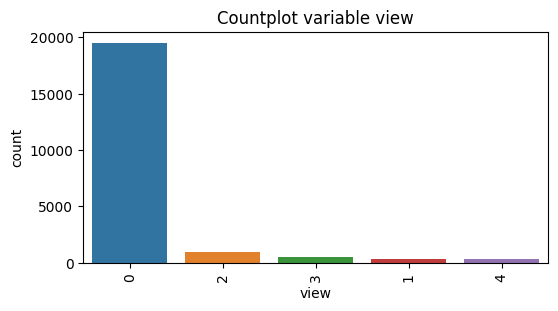

In [14]:
fig = plt.figure(figsize=(6,3))
ax = plt.axes()
ax = sns.countplot(x='view', data=kc_df, order=kc_df.view.value_counts()[:50].index)
plt.xticks(rotation=90)
plt.title("Countplot variable view")
plt.show()

Countplot de la variable grade

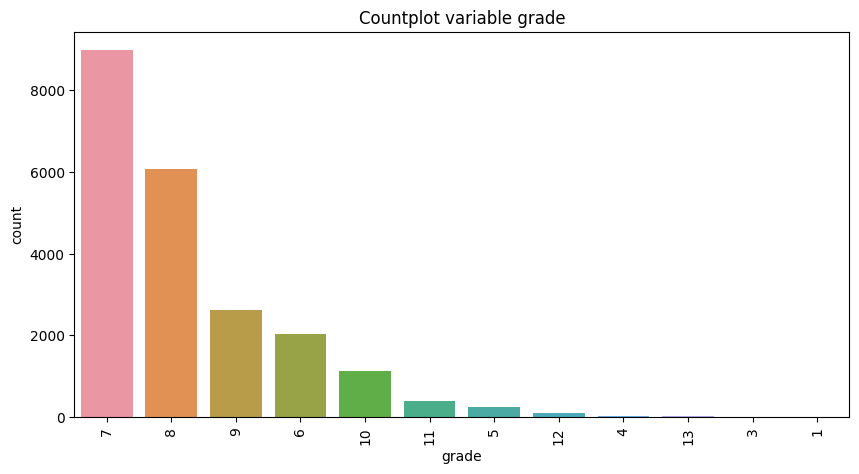

In [15]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax = sns.countplot(x='grade', data=kc_df, order=kc_df.grade.value_counts().index)
plt.xticks(rotation=90)
plt.title("Countplot variable grade")
plt.show()

Ploteamos las coordenadas lat, long de las propiedades

Text(0.5, 1.0, 'Ubicación de las propiedades en longitud vs latitud')

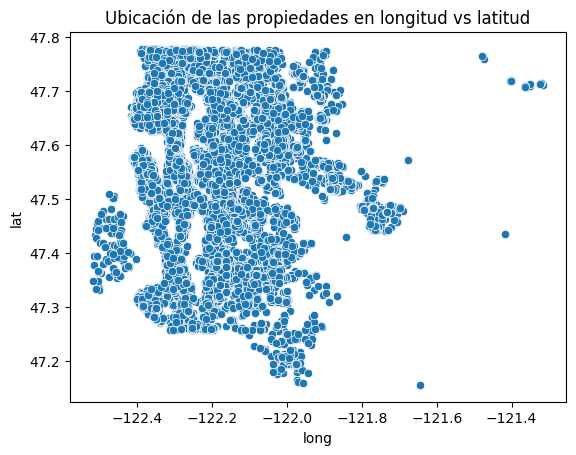

In [130]:
sns.scatterplot(x = "long", y = "lat", data = kc_df)
plt.title("Ubicación de las propiedades en longitud vs latitud")

Gráfico scatter plot de la variable "sqft_lot" vs "sqft_lot15"

Text(0.5, 1.0, 'Scatter plot variable sqft_lot vs sqft_lot15')

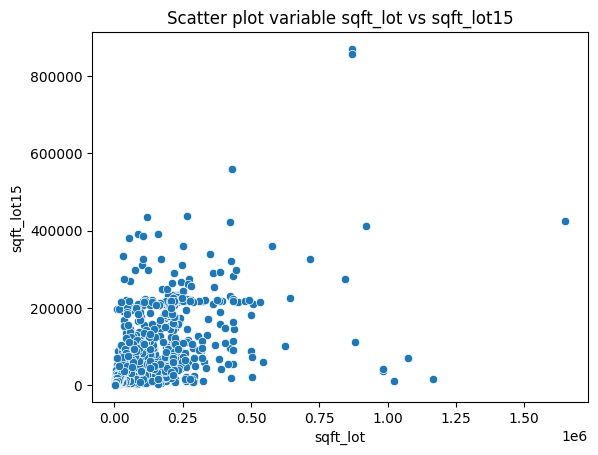

In [16]:
sns.scatterplot(x = "sqft_lot", y = "sqft_lot15", data = kc_df)
plt.title("Scatter plot variable sqft_lot vs sqft_lot15")

Gráfico scatter plot de la variable "sqft_living" vs "sqft_living15"

Text(0.5, 1.0, 'Scatter plot variable sqft_living vs sqft_living15')

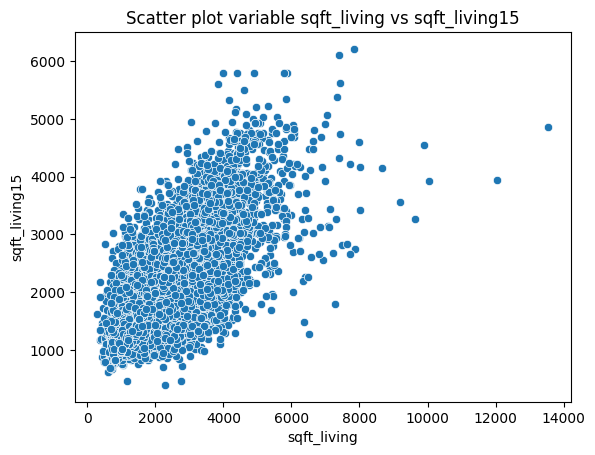

In [17]:
sns.scatterplot(x = "sqft_living", y = "sqft_living15", data = kc_df)
plt.title("Scatter plot variable sqft_living vs sqft_living15")

Gráfico scatter plot de la variable "sqft_above" vs "price"

Text(0.5, 1.0, 'Scatter plot variable sqft_above vs price')

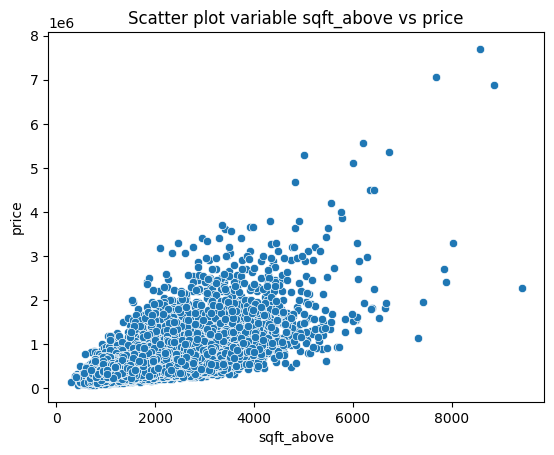

In [18]:
sns.scatterplot(x = "sqft_above", y = "price", data = kc_df)
plt.title("Scatter plot variable sqft_above vs price")

Gráfico scatter plot de la variable "sqft_living" vs "price"

Text(0.5, 1.0, 'Scatter plot variable sqft_living vs price')

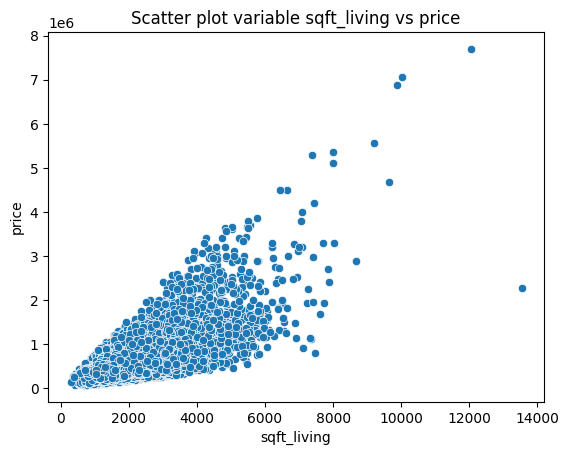

In [19]:
sns.scatterplot(x = "sqft_living", y = "price", data = kc_df)
plt.title("Scatter plot variable sqft_living vs price")

### Train and Test split

Dividimos el dataset en X e y 

In [20]:
X = kc_df.drop('price', axis = 1).copy()
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,average_price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,310612.755725
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,469455.770732
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,462480.035336
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,551688.673004
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,685605.775510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,584919.210963
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,359483.239583
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,594547.650146
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,616990.592233


In [21]:
y = kc_df['price'].copy()
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

Importamos sklearn y generamos el split para train y test

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17290, 19)
(4323, 19)
(17290,)
(4323,)


### Declaramos dependencias y funciones necesarias para los Pipelines

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, MinMaxScaler


Generamos una función para seleccionar features del conjunto de train

In [24]:
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.columns]

## GridSearchCV y predicciones

Importamos dependencias necesarias

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Pipeline para regresión lineal con todos los features

Consultamos los nombres de las columnas del X_train

In [26]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'average_price'],
      dtype='object')

Generamos el pipeline para la primera regresión lineal con todos los features numéricos del dataset, aplicamos standar scaler y el modelo de regresión lineal.

In [27]:
linear_pipe = Pipeline([
    ("featureSelector", FeatureSelector(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'average_price'])),
    ("scaler", StandardScaler()),
    ("linear", LinearRegression())
])

linear_pipe.fit(X_train,y_train)

Pipeline(steps=[('featureSelector',
                 FeatureSelector(columns=['bedrooms', 'bathrooms',
                                          'sqft_living', 'sqft_lot', 'floors',
                                          'waterfront', 'view', 'condition',
                                          'grade', 'sqft_above',
                                          'sqft_basement', 'yr_built',
                                          'yr_renovated', 'lat', 'long',
                                          'sqft_living15', 'sqft_lot15',
                                          'average_price'])),
                ('scaler', StandardScaler()), ('linear', LinearRegression())])

Predecimos con el modelo fiteado y mostramos el RMS y el score

In [28]:
train_preds_linear = linear_pipe.predict(X_train)
test_preds_linear = linear_pipe.predict(X_test)
print('El RMS sobre conjunto de Train:', mean_squared_error(train_preds_linear,y_train,squared=False))
print('El score sobre conjunto de Train:', r2_score(train_preds_linear,y_train))
print('RMS sobre conjunto de Test:', mean_squared_error(test_preds_linear,y_test,squared=False))
print('El score sobre conjunto de Test:', r2_score(test_preds_linear,y_test))


El RMS sobre conjunto de Train: 165487.30857459523
El score sobre conjunto de Train: 0.7349119493326186
RMS sobre conjunto de Test: 179216.14844960638
El score sobre conjunto de Test: 0.7187262475095952


Realizamos CV con 10 folds para obtener valor promedio del RMS y R cuadrado

In [29]:
linear_scores = cross_val_score(linear_pipe, X_test, y_test, cv=10, scoring='neg_root_mean_squared_error')
linear_r2_score = cross_val_score(linear_pipe, X_test, y_test, cv=10)

rms_linear_test = linear_scores.mean()*-1
r2_linear_test = linear_r2_score.mean()

print(f'El RMS promedio para test fue de: {rms_linear_test}')
print(f'El R cuadrado promedio para test fue de: {r2_linear_test}')


El RMS promedio para test fue de: 179859.20146315906
El R cuadrado promedio para test fue de: 0.7832074522151642


### Pipeline para regresión lineal sin los features "sqft_living15" y "sqft_lot15" 

En este pipeline dejamos por fuera los features sqft_living15 y sqft_lot15, aplicamos standard scaler y el modelo de regresión lineal

In [30]:
linear_pipe2 = Pipeline([
    ("featureSelector", FeatureSelector(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'average_price'])),
    ("scaler", StandardScaler()),
    ("linear", LinearRegression())
])

linear_pipe2.fit(X_train,y_train)

Pipeline(steps=[('featureSelector',
                 FeatureSelector(columns=['bedrooms', 'bathrooms',
                                          'sqft_living', 'sqft_lot', 'floors',
                                          'waterfront', 'view', 'condition',
                                          'grade', 'sqft_above',
                                          'sqft_basement', 'yr_built',
                                          'yr_renovated', 'lat', 'long',
                                          'average_price'])),
                ('scaler', StandardScaler()), ('linear', LinearRegression())])

Calculamos el RMS sobre el conjunto de Train y Test

In [31]:
train_preds_linear2 = linear_pipe2.predict(X_train)
test_preds_linear2 = linear_pipe2.predict(X_test)
print('RMS sobre conjunto de Train:', mean_squared_error(train_preds_linear2,y_train,squared=False))
print('RMS sobre conjunto de Test:', mean_squared_error(test_preds_linear2,y_test,squared=False))

RMS sobre conjunto de Train: 165682.29712757267
RMS sobre conjunto de Test: 179439.5391852967


Calculamos el RMS y score R cuadrado sobre el conjunto de test usando Cross Validation con 10 folds

In [32]:
linear_scores2 = cross_val_score(linear_pipe2, X_test, y_test, cv=10, scoring='neg_root_mean_squared_error')
linear_r2_score2 = cross_val_score(linear_pipe2, X_test, y_test, cv=10)

rms_linear2_test = linear_scores2.mean()*-1
r2_linear2_test= linear_r2_score2.mean()

print(f'El RMS promedio para test fue de: {rms_linear2_test}')
print(f'El R cuadrado promedio para test fue de: {r2_linear2_test}')


El RMS promedio para test fue de: 179940.04409163244
El R cuadrado promedio para test fue de: 0.7830463612338934


Para el modelo de regresión lineal las mejores métricas se obtuvieron usando todos los features.

### Pipeline y GridSearchCV para modelo Ridge regression

Generamos el pipeline a utilizar usando todos los features

In [33]:
pipe_ridge = Pipeline([
    ("featureSelector", FeatureSelector(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'average_price'])),
    ("featureScaler", StandardScaler()),
    ("model", Ridge())
])

Consultamos el nombre de los parámetros del pipeline

In [34]:
pipe_ridge.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'featureSelector', 'featureScaler', 'model', 'featureSelector__columns', 'featureScaler__copy', 'featureScaler__with_mean', 'featureScaler__with_std', 'model__alpha', 'model__copy_X', 'model__fit_intercept', 'model__max_iter', 'model__positive', 'model__random_state', 'model__solver', 'model__tol'])

Definimos el parámetro a optimizar, en este caso el alpha del modelo ridge y definimos algunos valores para testear

In [35]:
parameters_ridge = {
    'model__alpha': [0.0001, 0.001, 0.01,0.1,1,10,100,200,300,500,800,1000,10000],
}

In [36]:
ridge_gridsearch = GridSearchCV(pipe_ridge, parameters_ridge, n_jobs=-1, cv=10)
ridge_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('featureSelector',
                                        FeatureSelector(columns=['bedrooms',
                                                                 'bathrooms',
                                                                 'sqft_living',
                                                                 'sqft_lot',
                                                                 'floors',
                                                                 'waterfront',
                                                                 'view',
                                                                 'condition',
                                                                 'grade',
                                                                 'sqft_above',
                                                                 'sqft_basement',
                                                                 'yr_built',
                                                                 'yr_renovated',
                                                                 'lat', 'long',
                                                                 'sqft_living15',
                                                                 'sqft_lot15',
                                                                 'average_price'])),
                                       ('featureScaler', StandardScaler()),
                                       ('model', Ridge())]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                          200, 300, 500, 800, 1000, 10000]})

Consultamos el mejor valor para alpha

In [37]:
ridge_gridsearch.best_params_

{'model__alpha': 200}

Predecimos para train y para test y obtenemos el valor del RMS y el score

In [38]:
train_preds_ridge_gs = ridge_gridsearch.predict(X_train)
test_preds_ridge_gs = ridge_gridsearch.predict(X_test)

In [39]:
rms_ridge_train = mean_squared_error(train_preds_ridge_gs,y_train,squared=False)
r2_ridge_train = ridge_gridsearch.score(X_train, y_train)

rms_ridge_test = mean_squared_error(test_preds_ridge_gs, y_test,squared=False)
r2_ridge_test = ridge_gridsearch.score(X_test, y_test)

print('El RMS sobre conjunto de Train:', rms_ridge_train)
print('El Score sobre el conjunto de Train fue :', r2_ridge_train )

print('El RMS sobre conjunto de Test:', rms_ridge_test)
print('El Score sobre el conjunto de Test fue :', r2_ridge_test)

El RMS sobre conjunto de Train: 165522.0717766286
El Score sobre el conjunto de Train fue : 0.7902958519164949
El RMS sobre conjunto de Test: 179344.07540880147
El Score sobre el conjunto de Test fue : 0.7872403963277812


### Pipeline y GridSearchCV para modelo Lasso regression

Generamos el pipeline a utilizar

In [40]:
pipe_lasso = Pipeline([
    ("featureSelector", FeatureSelector(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'average_price'])),
    ("featureScaler", StandardScaler()),
    ("model", Lasso())
])

Consultamos el nombre de los parámetros del pipeline

In [41]:
pipe_lasso.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'featureSelector', 'featureScaler', 'model', 'featureSelector__columns', 'featureScaler__copy', 'featureScaler__with_mean', 'featureScaler__with_std', 'model__alpha', 'model__copy_X', 'model__fit_intercept', 'model__max_iter', 'model__positive', 'model__precompute', 'model__random_state', 'model__selection', 'model__tol', 'model__warm_start'])

Definimos el parámetros a optimizar, en este caso el alpha del modelo lasso.

In [42]:
parameters_lasso = {
    'model__alpha': [0.0001, 0.001, 0.01,0.1,1,10,100,200,300,500,800,1000,10000],
}

In [43]:
lasso_gridsearch = GridSearchCV(pipe_lasso, parameters_lasso, n_jobs=-1, cv=10)
lasso_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('featureSelector',
                                        FeatureSelector(columns=['bedrooms',
                                                                 'bathrooms',
                                                                 'sqft_living',
                                                                 'sqft_lot',
                                                                 'floors',
                                                                 'waterfront',
                                                                 'view',
                                                                 'condition',
                                                                 'grade',
                                                                 'sqft_above',
                                                                 'sqft_basement',
                                                                 'yr_built',
                                                                 'yr_renovated',
                                                                 'lat', 'long',
                                                                 'sqft_living15',
                                                                 'sqft_lot15',
                                                                 'average_price'])),
                                       ('featureScaler', StandardScaler()),
                                       ('model', Lasso())]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                          200, 300, 500, 800, 1000, 10000]})

Consultamos el mejor valor para alpha

In [44]:
lasso_gridsearch.best_params_

{'model__alpha': 500}

Predecimos para train y para test y obtenemos el valor del RMS y el score

In [45]:
train_preds_lasso_gs = lasso_gridsearch.predict(X_train)
test_preds_lasso_gs = lasso_gridsearch.predict(X_test)

In [46]:
rms_lasso_train = mean_squared_error(train_preds_lasso_gs,y_train,squared=False)
r2_lasso_train = lasso_gridsearch.score(X_train, y_train)

rms_lasso_test = mean_squared_error(test_preds_lasso_gs, y_test,squared=False)
r2_lasso_test = lasso_gridsearch.score(X_test, y_test)

print('El RMS sobre conjunto de Train:', rms_lasso_train)
print('El Score sobre el conjunto de Train fue :', r2_lasso_train)

print('El RMS sobre conjunto de Test:', rms_lasso_test)
print('El Score sobre el conjunto de Test fue :', r2_lasso_test)

El RMS sobre conjunto de Train: 165520.75904797134
El Score sobre el conjunto de Train fue : 0.7902991781623564
El RMS sobre conjunto de Test: 179276.5820002786
El Score sobre el conjunto de Test fue : 0.7874005038613683


### Pipeline y GridSearchCV para Decision Tree Regressor

In [47]:
from sklearn.tree import DecisionTreeRegressor

#### Probamos el modelo con un Pipeline con todos los features

In [48]:
pipe_dtreg = Pipeline([
    ("featureSelector", FeatureSelector(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'average_price','sqft_living15', 'sqft_lot15'])),
    ("featureScaler", StandardScaler()),
    ("model", DecisionTreeRegressor(random_state=42))
])

In [49]:
pipe_dtreg.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'featureSelector', 'featureScaler', 'model', 'featureSelector__columns', 'featureScaler__copy', 'featureScaler__with_mean', 'featureScaler__with_std', 'model__ccp_alpha', 'model__criterion', 'model__max_depth', 'model__max_features', 'model__max_leaf_nodes', 'model__min_impurity_decrease', 'model__min_samples_leaf', 'model__min_samples_split', 'model__min_weight_fraction_leaf', 'model__random_state', 'model__splitter'])

Establecemos el diccionario con los parámetros a optimizar usando GridSearchCV

In [50]:
parameters_dtreg = {
    'model__max_depth': [1,2,3,5,8,10,12,15,20,None],
    'model__max_features': ['auto', 'sqrt', 'log2' ,None],
    'model__min_samples_leaf': [1,3,4,5,7,8,10,15,25,50,100,500]
}

In [51]:
dtreg_gridsearch = GridSearchCV(pipe_dtreg, parameters_dtreg, n_jobs=-1, cv=10)
dtreg_gridsearch.fit(X_train, y_train)

C:\Users\keive\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1200 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
747 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\keive\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\keive\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('featureSelector',
                                        FeatureSelector(columns=['bedrooms',
                                                                 'bathrooms',
                                                                 'sqft_living',
                                                                 'sqft_lot',
                                                                 'floors',
                                                                 'waterfront',
                                                                 'view',
                                                                 'condition',
                                                                 'grade',
                                                                 'sqft_above',
                                                                 'sqft_basement',
                                                                 'yr_built',
                                                                 'yr_renovated',
                                                                 'lat', 'long',
                                                                 'average_price',
                                                                 'sqft_living15',
                                                                 'sqft_lot15'])),
                                       ('featureScaler', StandardScaler()),
                                       ('model',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [1, 2, 3, 5, 8, 10, 12, 15, 20,
                                              None],
                         'model__max_features': ['auto', 'sqrt', 'log2', None],
                         'model__min_samples_leaf': [1, 3, 4, 5, 7, 8, 10, 15,
                                                     25, 50, 100, 500]})

In [52]:
dtreg_gridsearch.best_params_

{'model__max_depth': 10,
 'model__max_features': None,
 'model__min_samples_leaf': 5}

In [53]:
train_preds_dtreg = dtreg_gridsearch.predict(X_train)
test_preds_dtreg = dtreg_gridsearch.predict(X_test)

rms_dtreg_train = mean_squared_error(train_preds_dtreg,y_train,squared=False)
r2_dtreg_train = dtreg_gridsearch.score(X_train, y_train)

rms_dtreg_test = mean_squared_error(test_preds_dtreg, y_test,squared=False)
r2_dtreg_test = dtreg_gridsearch.score(X_test, y_test)

print('El RMS sobre conjunto de Train:', rms_dtreg_train)
print('El Score sobre el conjunto de Train fue :', r2_dtreg_train)

print('El RMS sobre conjunto de Test:', rms_dtreg_test)
print('El Score sobre el conjunto de Test fue :', r2_dtreg_test)

El RMS sobre conjunto de Train: 112133.80937715126
El Score sobre el conjunto de Train fue : 0.9037571785547923
El RMS sobre conjunto de Test: 171398.6121788191
El Score sobre el conjunto de Test fue : 0.8056745392973524


#### Probamos el modelo con un Pipeline sin los features "sqft_living15" y "sqft_lot15"

Definimos el pipeline excluyendo los features "sqft_living15" y "sqft_lot15", aplicando standard scaler y el modelo Decision Tree Regressor

In [54]:
pipe_dtreg2 = Pipeline([
    ("featureSelector", FeatureSelector(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'average_price'])),
    ("featureScaler", StandardScaler()),
    ("model", DecisionTreeRegressor(random_state=42))
])


Definimos el diccionario con los parámetros a optimizar con el gridsearchcv

In [55]:
parameters_dtreg2 = {
    'model__max_depth': [1,2,3,5,8,10,12,15,20,None],
    'model__max_features': ['auto', 'sqrt', 'log2' ,None],
    'model__min_samples_leaf': [1,5,10,15,25,50,100,500]
}

Aplicapmos el gridsearchcv y fiteamos el modelo con el conjunto de Train

In [56]:
dtreg2_gridsearch = GridSearchCV(pipe_dtreg2, parameters_dtreg2, n_jobs=-1, cv=10)
dtreg2_gridsearch.fit(X_train, y_train)

C:\Users\keive\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
800 fits failed out of a total of 3200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
476 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\keive\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\keive\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('featureSelector',
                                        FeatureSelector(columns=['bedrooms',
                                                                 'bathrooms',
                                                                 'sqft_living',
                                                                 'sqft_lot',
                                                                 'floors',
                                                                 'waterfront',
                                                                 'view',
                                                                 'condition',
                                                                 'grade',
                                                                 'sqft_above',
                                                                 'sqft_basement',
                                                                 'yr_built',
                                                                 'yr_renovated',
                                                                 'lat', 'long',
                                                                 'average_price'])),
                                       ('featureScaler', StandardScaler()),
                                       ('model',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [1, 2, 3, 5, 8, 10, 12, 15, 20,
                                              None],
                         'model__max_features': ['auto', 'sqrt', 'log2', None],
                         'model__min_samples_leaf': [1, 5, 10, 15, 25, 50, 100,
                                                     500]})

Visualizamos los mejores parámetros obtenidos 

In [57]:
dtreg2_gridsearch.best_params_

{'model__max_depth': 12,
 'model__max_features': None,
 'model__min_samples_leaf': 5}

Ploteamos el RMS y el R cuadrado para los conjuntos de train y test

In [58]:
train_preds_dtreg2 = dtreg2_gridsearch.predict(X_train)
test_preds_dtreg2 = dtreg2_gridsearch.predict(X_test)

rms_dtreg2_train = mean_squared_error(train_preds_dtreg2,y_train,squared=False)
r2_dtreg2_train = dtreg2_gridsearch.score(X_train, y_train)

rms_dtreg2_test = mean_squared_error(test_preds_dtreg2, y_test,squared=False)
r2_dtreg2_test = dtreg2_gridsearch.score(X_test, y_test)

print('El RMS sobre conjunto de Train:', rms_dtreg2_train)
print('El Score sobre el conjunto de Train fue :', r2_dtreg2_train)

print('El RMS sobre conjunto de Test:', rms_dtreg2_test)
print('El Score sobre el conjunto de Test fue :', r2_dtreg2_test)

El RMS sobre conjunto de Train: 101299.04496068145
El Score sobre el conjunto de Train fue : 0.9214572874887346
El RMS sobre conjunto de Test: 170792.19310322008
El Score sobre el conjunto de Test fue : 0.8070471781695687


Se obtienen mejores métricas excluyendo los features "sqft_living15" y "sqft_lot15" del modelo Decision Tree Regressor

### Pipeline y GridSearchCV para KNN Regressor y Random Forest Regressor

#### Definimos Pipeline para el KNN Regressor

In [59]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor()

Defimos Pipeline y fiteamos el modelo con el conjunto de Train

In [60]:
knn_pipe = Pipeline([
    ("featureSelector", FeatureSelector(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'average_price'])),
    ("scaler", StandardScaler()),
    ("knn_regressor", KNeighborsRegressor())
])

knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('featureSelector',
                 FeatureSelector(columns=['bedrooms', 'bathrooms',
                                          'sqft_living', 'sqft_lot', 'floors',
                                          'waterfront', 'view', 'condition',
                                          'grade', 'sqft_above',
                                          'sqft_basement', 'yr_built',
                                          'yr_renovated', 'lat', 'long',
                                          'sqft_living15', 'sqft_lot15',
                                          'average_price'])),
                ('scaler', StandardScaler()),
                ('knn_regressor', KNeighborsRegressor())])

Evaluamos las métricas RMS y R cuadrado para los conjuntos de train y test

In [61]:
train_preds_knn = knn_pipe.predict(X_train)
test_preds_knn = knn_pipe.predict(X_test)
print('RMSE sobre conjunto de Train:', mean_squared_error(train_preds_knn,y_train,squared=False))
print('RMSE sobre conjunto de Test:', mean_squared_error(test_preds_knn,y_test,squared=False))
print("R-squared:", r2_score(y_test, test_preds_knn))

RMSE sobre conjunto de Train: 118471.19479508394
RMSE sobre conjunto de Test: 165125.85965595907
R-squared: 0.8196378984562629


#### Definimos Pipeline para Random Forest Regressor

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()

Definimos el pipeline para el modelo random forest regressor y fiteamos con el conjunto de Train

In [63]:
rf_pipe = Pipeline([
    ("featureSelector", FeatureSelector(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'average_price'])),
    ("scaler", StandardScaler()),
    ("rf_regressor", RandomForestRegressor())
])

rf_pipe.fit(X_train,y_train)

Pipeline(steps=[('featureSelector',
                 FeatureSelector(columns=['bedrooms', 'bathrooms',
                                          'sqft_living', 'sqft_lot', 'floors',
                                          'waterfront', 'view', 'condition',
                                          'grade', 'sqft_above',
                                          'sqft_basement', 'yr_built',
                                          'yr_renovated', 'lat', 'long',
                                          'sqft_living15', 'sqft_lot15',
                                          'average_price'])),
                ('scaler', StandardScaler()),
                ('rf_regressor', RandomForestRegressor())])

Predecimos con el modelo fiteado y evaluamos las métricas antes de realizar el GridSearchCV y optimizar los parámetros

In [64]:
train_preds_rf = rf_pipe.predict(X_train)
test_preds_rf = rf_pipe.predict(X_test)
print('RMSE sobre conjunto de Train:', mean_squared_error(train_preds_rf,y_train,squared=False))
print('RMSE sobre conjunto de Test:', mean_squared_error(test_preds_rf,y_test,squared=False))
print("R-squared:", r2_score(y_test, test_preds_rf))

RMSE sobre conjunto de Train: 45437.40715052733
RMSE sobre conjunto de Test: 137703.40883007372
R-squared: 0.8745691150419737


#### GridsearchCV para los modelos knn y random forest regressor


Definimos los parámetros optimizar en ambos modelos knn y rf regressor

In [65]:
param_grid_knn = {
    'knn_regressor__n_neighbors': [3, 5, 7],
    'knn_regressor__weights': ['uniform', 'distance']
}
param_grid_rf = {        
    'rf_regressor__max_depth': [None, 10, 20], 
    
} 

Aplicamos el gridsearchcv a cada uno de los pipelines de los modelos

In [66]:
grid_search_knn = GridSearchCV(knn_pipe, param_grid_knn,  n_jobs=-1, cv=10, scoring='neg_mean_squared_error')
grid_search_rf = GridSearchCV(rf_pipe, param_grid_rf,  n_jobs=-1, cv=10, scoring='neg_mean_squared_error')

Fiteamos cada modelo con el conjunto train

In [67]:
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('featureSelector',
                                        FeatureSelector(columns=['bedrooms',
                                                                 'bathrooms',
                                                                 'sqft_living',
                                                                 'sqft_lot',
                                                                 'floors',
                                                                 'waterfront',
                                                                 'view',
                                                                 'condition',
                                                                 'grade',
                                                                 'sqft_above',
                                                                 'sqft_basement',
                                                                 'yr_built',
                                                                 'yr_renovated',
                                                                 'lat', 'long',
                                                                 'sqft_living15',
                                                                 'sqft_lot15',
                                                                 'average_price'])),
                                       ('scaler', StandardScaler()),
                                       ('knn_regressor',
                                        KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn_regressor__n_neighbors': [3, 5, 7],
                         'knn_regressor__weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [68]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('featureSelector',
                                        FeatureSelector(columns=['bedrooms',
                                                                 'bathrooms',
                                                                 'sqft_living',
                                                                 'sqft_lot',
                                                                 'floors',
                                                                 'waterfront',
                                                                 'view',
                                                                 'condition',
                                                                 'grade',
                                                                 'sqft_above',
                                                                 'sqft_basement',
                                                                 'yr_built',
                                                                 'yr_renovated',
                                                                 'lat', 'long',
                                                                 'sqft_living15',
                                                                 'sqft_lot15',
                                                                 'average_price'])),
                                       ('scaler', StandardScaler()),
                                       ('rf_regressor',
                                        RandomForestRegressor())]),
             n_jobs=-1, param_grid={'rf_regressor__max_depth': [None, 10, 20]},
             scoring='neg_mean_squared_error')

Predecimos con el conjunto de test para cada modelo

In [69]:
predictions_knn = grid_search_knn.predict(X_test)

In [70]:
predictions_rf = grid_search_rf.predict(X_test)

Evaluamos las métricas para el modelo knn en el conjunto Test

In [71]:
rms_knn = mean_squared_error(y_test, predictions_knn,squared=False)
r2_knn = r2_score(y_test, predictions_knn)


Evaluamos las métricas para el modelo random forest regressor en el conjunto Test

In [72]:
rms_rf = mean_squared_error(y_test, predictions_rf,squared=False)
r2_rf = r2_score(y_test, predictions_rf)

Ploteamos los parámetros optimizados para el modelo knn junto con las métricas obtenidas para el conjunto Test

In [73]:
print("Best Parameters KNN:", grid_search_knn.best_params_)
print("RMS KNN:", rms_knn)
print("R-squared KNN:", r2_knn)

Best Parameters KNN: {'knn_regressor__n_neighbors': 5, 'knn_regressor__weights': 'distance'}
RMS KNN: 164347.7947039244
R-squared KNN: 0.8213336087230708


Ploteamos los parámetros optimizados para el modelo random forest regressor junto con las métricas obtenidas para el conjunto Test

In [74]:
print("Best Parameters RF:", grid_search_rf.best_params_)
print("RMS RF:", rms_rf)
print("R-squared RF:", r2_rf)

Best Parameters RF: {'rf_regressor__max_depth': None}
RMS RF: 136437.36932759354
R-squared RF: 0.8768649253503668


### Ensemble Regressor

Importamos algunas dependencias 

In [75]:
from sklearn.ensemble import VotingRegressor

Definimos el ensemble regressor usando los modelos knn y rf regresor previamente entrenados

In [76]:
ensemble_regressor = VotingRegressor(estimators=[
    ('knn', grid_search_knn),
    ('rf', grid_search_rf)
])

Fiteamos el ensemble regressor usando el conjunto Train

In [77]:
ensemble_regressor.fit(X_train, y_train)

VotingRegressor(estimators=[('knn',
                             GridSearchCV(cv=10,
                                          estimator=Pipeline(steps=[('featureSelector',
                                                                     FeatureSelector(columns=['bedrooms',
                                                                                              'bathrooms',
                                                                                              'sqft_living',
                                                                                              'sqft_lot',
                                                                                              'floors',
                                                                                              'waterfront',
                                                                                              'view',
                                                                                              'condition',
                                                                                              'grade',
                                                                                              'sqft_above',
                                                                                              'sqft_basement',
                                                                                              'yr_built',
                                                                                              'yr_renovated',
                                                                                              'lat',
                                                                                              'long',
                                                                                              'sqft_living15',
                                                                                              'sqft_lot15',
                                                                                              'average_price'])),
                                                                    ('scaler',
                                                                     Sta...
                                                                                              'sqft_living',
                                                                                              'sqft_lot',
                                                                                              'floors',
                                                                                              'waterfront',
                                                                                              'view',
                                                                                              'condition',
                                                                                              'grade',
                                                                                              'sqft_above',
                                                                                              'sqft_basement',
                                                                                              'yr_built',
                                                                                              'yr_renovated',
                                                                                              'lat',
                                                                                              'long',
                                                                                              'sqft_living15',
                                                                                              'sqft_lot15',
                                                                                              'average_price'])),
                                       

Predecimos para el conjunto test usando el ensemble regressor ya fiteado

In [78]:
predictions_ens = ensemble_regressor.predict(X_test)

Evaluamos y ploteamos las métricas obtenidas por el ensemble regressor

In [79]:
mae_ens = mean_absolute_error(y_test,predictions_ens)
rms_ens = mean_squared_error(y_test, predictions_ens,squared=False)
r2_ens = r2_score(y_test, predictions_ens)

In [80]:
print("Ensemble Mean Absolute Error", mae_ens)
print("Ensemble RMS:", rms_ens)
print("Ensemble R-squared:", r2_ens)

Ensemble Mean Absolute Error 73086.70238382326
Ensemble RMS: 141851.71179809023
Ensemble R-squared: 0.8668980966733795


## Comparación de las métricas obtenidas en cada modelo

Generamos un diccionario con todos las métricas obtenidas para el conjunto test de cada uno de los modelos

In [81]:
metricas = {
    'rms_test': [rms_linear_test,rms_linear2_test,rms_ridge_test,rms_lasso_test,rms_dtreg_test,rms_dtreg2_test,rms_knn, rms_rf, rms_ens],
    'r2_test':[r2_linear_test, r2_linear2_test,r2_ridge_test,r2_lasso_test,r2_dtreg_test,r2_dtreg2_test,r2_knn, r2_rf, r2_ens]
}

Generamos gráfico para la métrica RMS en el conjunto test para todos los modelos

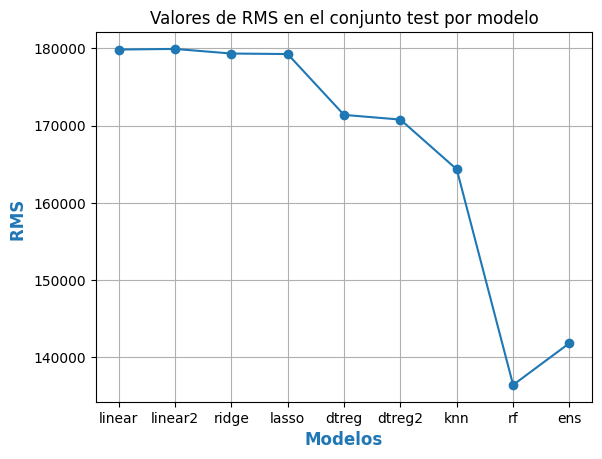

In [132]:
fig, ax = plt.subplots()
modelo = ['linear','linear2','ridge','lasso','dtreg','dtreg2','knn','rf','ens']
RMS = metricas['rms_test']
ax.plot(modelo, RMS, marker = 'o')
ax.set_title('Valores de RMS en el conjunto test por modelo')
ax.set_xlabel('Modelos', fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel('RMS ', fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'tab:blue'})
plt.grid()
plt.show()

Generamos gráfico para la métrica R cuadrado en el conjunto test para todos los modelos

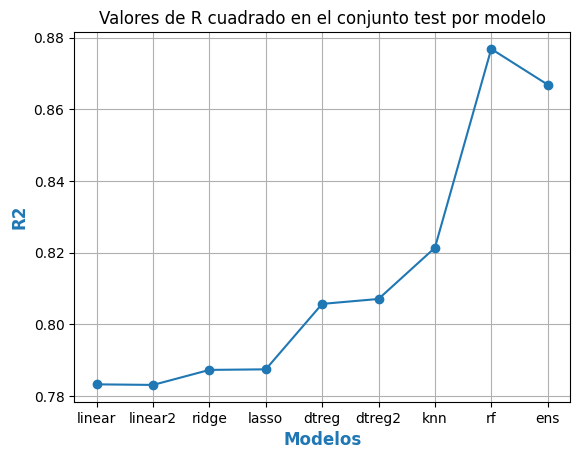

In [133]:
fig, ax = plt.subplots()
modelo = ['linear','linear2','ridge','lasso','dtreg','dtreg2','knn','rf','ens']
R2 = metricas['r2_test']
ax.plot(modelo, R2, marker = 'o')
ax.set_title('Valores de R cuadrado en el conjunto test por modelo')
ax.set_xlabel('Modelos', fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel('R2', fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'tab:blue'})
plt.grid()
plt.show()

Ploteamos los residuales del modelo de random forest

Text(0.5, 1.0, 'Residuals Random forest regressor plot')

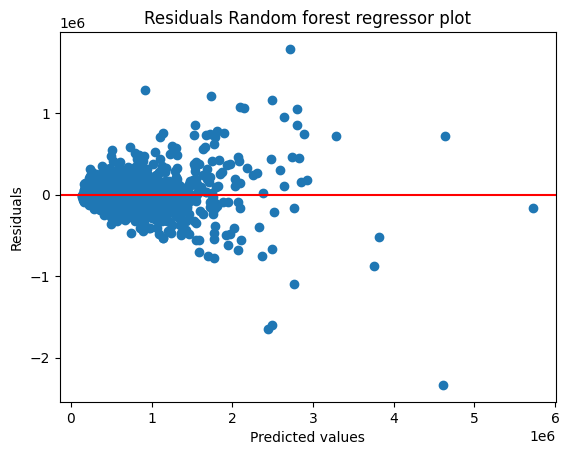

In [137]:
residuals_rf = y_test - predictions_rf
plt.scatter(predictions_rf, residuals_rf)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals Random forest regressor plot')

Ploteamos los residuales del ensemble para comparar con el modelo seleccionado 

Text(0.5, 1.0, 'Residuals Ensemble plot')

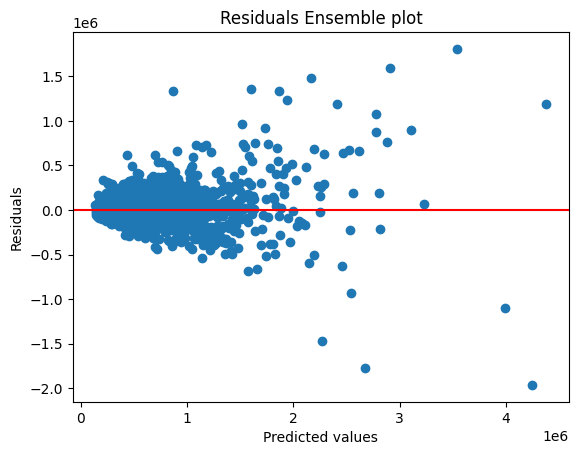

In [138]:
residuals_ens = y_test - predictions_ens
plt.scatter(predictions_ens, residuals_ens)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals Ensemble plot')